In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Stable thread mode for Windows environments
os.environ["OMP_NUM_THREADS"] = "1"
sns.set_theme(style="whitegrid")

print("Project 5: E-commerce Analytics Module Initialized.")

Project 5: E-commerce Analytics Module Initialized.


In [3]:
data_path = os.path.join('..', 'data', 'ecommerce_data.csv')

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    # Critical step: Remove extra spaces from column headers
    df.columns = df.columns.str.strip()
    print("E-commerce Data Loaded.")
    display(df.head())
else:
    print(f"Error: Could not find data at {os.path.abspath(data_path)}")

E-commerce Data Loaded.


,Transaction_ID,Customer_ID,Product_Category,Purchase_Amount,Age,Gender,Source,Time_Spent_mins
0,T1001,C501,Electronics,1200,28,Male,Google,15
1,T1002,C502,Apparel,450,34,Female,Instagram,22
2,T1003,C503,Home,800,45,Female,Direct,10
3,T1004,C504,Electronics,1500,22,Male,Google,30
4,T1005,C505,Apparel,300,31,Male,Facebook,12


In [4]:
# 1. Calculate Average Order Value (AOV)
# Standardizing 'Purchase_Amount' as the primary revenue metric
aov = df['Purchase_Amount'].mean()
print(f"Average Order Value: ${aov:.2f}")

# 2. Source Performance (Revenue by Acquisition Channel)
source_revenue = df.groupby('Source')['Purchase_Amount'].sum().sort_values(ascending=False)
print("\nRevenue by Acquisition Source:")
print(source_revenue)

Average Order Value: $935.00

Revenue by Acquisition Source:
Source
Google       4900
Direct       2950
Instagram    1050
Facebook      450
Name: Purchase_Amount, dtype: int64


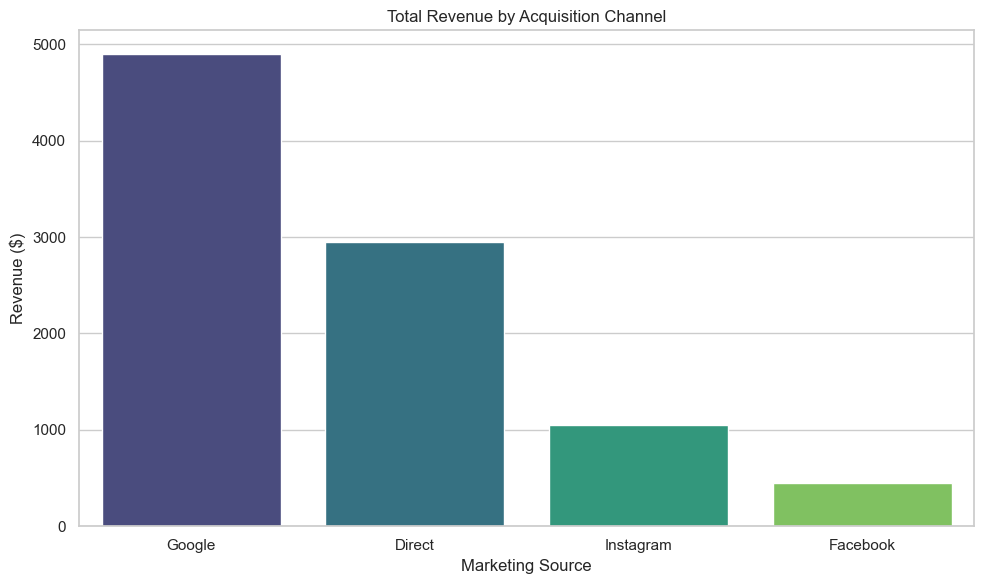

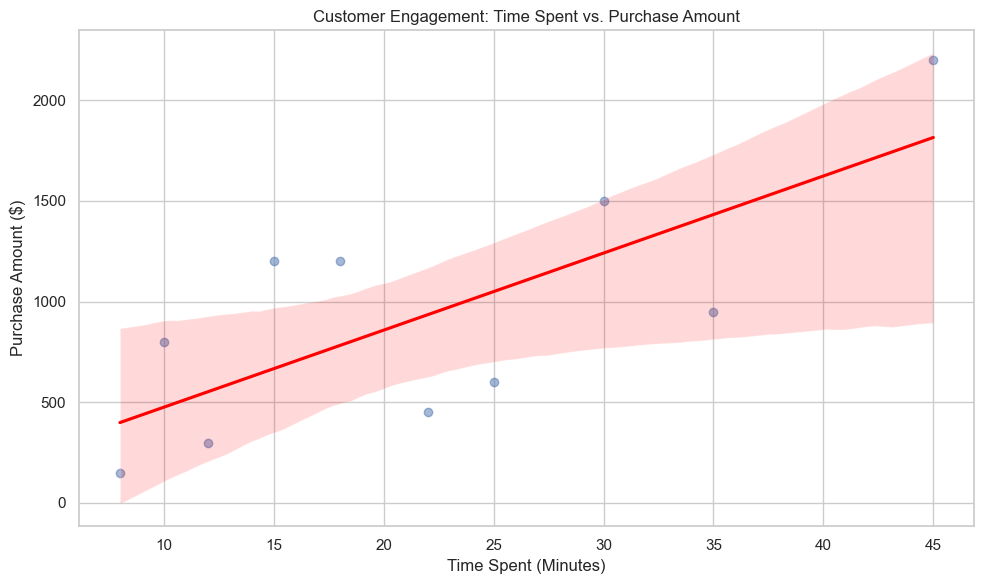

In [5]:
viz_path = '../visualizations/'
os.makedirs(viz_path, exist_ok=True)

# Visualization 1: Revenue by Marketing Source
plt.figure(figsize=(10, 6))
# Added 'hue' and set 'legend' to False for a cleaner professional look
sns.barplot(x=source_revenue.index, y=source_revenue.values, hue=source_revenue.index, palette='viridis', legend=False)
plt.title('Total Revenue by Acquisition Channel')
plt.ylabel('Revenue ($)')
plt.xlabel('Marketing Source')

plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'ecommerce_source_revenue.png'))
plt.show()

# Visualization 2: Engagement Analysis
plt.figure(figsize=(10, 6))
# Regplot helps show the trend line for customer engagement
sns.regplot(data=df, x='Time_Spent_mins', y='Purchase_Amount', 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Customer Engagement: Time Spent vs. Purchase Amount')
plt.xlabel('Time Spent (Minutes)')
plt.ylabel('Purchase Amount ($)')

plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'ecommerce_engagement_correlation.png'))
plt.show()